
# CNN Cancer Detector
<img src="images/Melanoma.jpg" alt="Melanoma" width="500"/>

 ## Intro
<p>Skin cancer is the most common form of cancer, with 1 in 5 Americans developping it by the time they reach 70 years old. Over 2 people die of skin cancer in the US every hour.<sup>[1]</sup> 
Early detection is key in saving peoples lives with skin cancer, with the early detection 5 year survival rate being 99%<sup>[1]</sup>. Dermatologist have to look at patients one by one, and must assess by eye whether or not a blemish is malignant or benign. Dermatologist's have around a 66% accuracy rate in assessing 752 different skin diseases, while CNN's, such as the one detailed in *Dermatologist-level classification of skin cancer with deep neural networks* published in Nature have achieved greater accuracy levels then dermatologist's, around 72.1%<sup>[2]</sup>.<br>
<p>By converting cancer detection to easily deployable software, you could allow people to get accurate cancer testing at home, saving resources and time. By making cancer detection more accesible, people would be more likely to get tested, saving lives in the process. Below I will detail my process and results from a melanoma (the most deadly form of skin cancer) detector model using CNN's.<br>


In [18]:
#import necessary libraries
from torch import nn
from torchvision import models
#import imgaug as ia
#import imgaug.augmenters as iaa
from torchvision import datasets
from torch.utils.data.dataloader import DataLoader
from torchvision import transforms
from torch import optim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [19]:
#preprocess images

train_transform = transforms.Compose([transforms.RandomResizedCrop(299),
                                       transforms.RandomOrder([transforms.RandomChoice([transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(15)]),]),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
#make test transformer with no augmentation  
test_transform = transforms.Compose([transforms.Resize(299),
                                     transforms.CenterCrop(299),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])                                        

#make train,valid and test loaders
train_data = datasets.ImageFolder(root = 'merged_train_valid',transform = train_transform)
train_loader = DataLoader(train_data,shuffle = True,batch_size = 16,num_workers = 0)
test_data = datasets.ImageFolder(root = 'data/test',transform = test_transform)
test_loader = DataLoader(test_data,shuffle = True,batch_size = 16,num_workers = 0)
train_iter = iter(train_loader)

data,label = train_iter.next()
data = data.numpy()
loaders = {}
loaders['train'] = train_loader
loaders['valid'] = valid_loader
loaders['test'] = test_loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

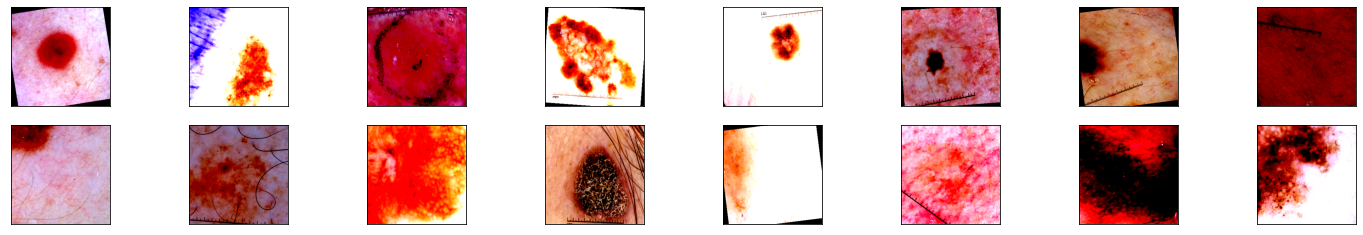

In [20]:
#visualize augmented training data
def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))
fig = plt.figure(figsize=(25, 4))
# display 32 images
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(data[idx])
  

<p>References:<br>
<p>[1] Skin Cancer Facts &amp; Statistics. (2020, July 10). Retrieved July 15, 2020, from https://www.skincancer.org/skin-cancer-information/skin-cancer-facts/<br>
<p>[2]Esteva, A., Kuprel, B., Novoa, R. A., Ko, J., Swetter, S. M., Blau, H. M., &amp; Thrun, S. (2017). Dermatologist-level classification of skin cancer with deep neural networks. Nature, 542(7639), 115-118. doi:10.1038/nature21056<br>


In [21]:
#load xception model
import pretrainedmodels

model_name = 'xception' # could be fbresnet152 or inceptionresnetv2
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')


In [26]:

#alter last layer to fit 3 classes.
model.last_linear = nn.Sequential(nn.Dropout(p = 0.5 ), nn.Linear(2048,1000), nn.Dropout(p=0.5),nn.Linear(1000,3))
                                
from skorch import NeuralNetClassifier
from skorch.callbacks import Checkpoint
checkpoint = Checkpoint(dirname='Skorch_model_xception')
net = NeuralNetClassifier(module = model, optimizer = optim.Adam,max_epochs = 100, lr = 0.001,batch_size = 16,criterion = nn.CrossEntropyLoss,callbacks = [checkpoint],device = 'cuda')



In [29]:
#fit model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

net.fit(train_data,np.array(train_data.targets))

Re-initializing optimizer.


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Xception(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (block1): Block(
      (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (rep): Sequential(
        (0): SeparableConv2d(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, t

Epoch: 1 	Training Loss: 0.691850 	Validation Loss: 0.674727
SAVING MODEL
Epoch: 2 	Training Loss: 0.657271 	Validation Loss: 0.705817
Epoch: 3 	Training Loss: 0.614162 	Validation Loss: 0.743958
Epoch: 4 	Training Loss: 0.620844 	Validation Loss: 0.746876
Epoch: 5 	Training Loss: 0.618216 	Validation Loss: 0.648388
SAVING MODEL
Epoch: 6 	Training Loss: 0.614101 	Validation Loss: 0.624272
SAVING MODEL
Epoch: 7 	Training Loss: 0.583011 	Validation Loss: 0.698581
Epoch: 8 	Training Loss: 0.568877 	Validation Loss: 0.550874
SAVING MODEL
Epoch: 9 	Training Loss: 0.555631 	Validation Loss: 0.735310
Epoch: 10 	Training Loss: 0.561462 	Validation Loss: 0.613382
Epoch: 11 	Training Loss: 0.544124 	Validation Loss: 0.606578
Epoch: 12 	Training Loss: 0.532853 	Validation Loss: 0.697018
Epoch: 13 	Training Loss: 0.533942 	Validation Loss: 0.510651
SAVING MODEL
Epoch: 14 	Training Loss: 0.490172 	Validation Loss: 0.634466
Epoch: 15 	Training Loss: 0.520940 	Validation Loss: 0.520622
Epoch: 16 	Tra

<All keys matched successfully>

In [12]:
net.score(test_data,np.array(test_data.targets))

Test Loss: 0.609814


Test Accuracy: 74% (447/600)
